In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# averageRating

In [ ]:
# reading the dataset
train_df = pd.read_csv('train11.csv')
test_df = pd.read_csv("test3.csv")

In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','averageRating','ratingCount'], axis = 1)
y_train = train_df['averageRating']
X_test = test_df.drop(['originalTitle','averageRating','ratingCount'], axis = 1)
y_test = test_df['averageRating']

In [ ]:
# Train initial KNN Regression model
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = knr.predict(X_test)
print("Initial KNN Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial KNN Regression Performance:
RMSE: 1.2604720389455986
R^2 Score: 0.1635687431248256


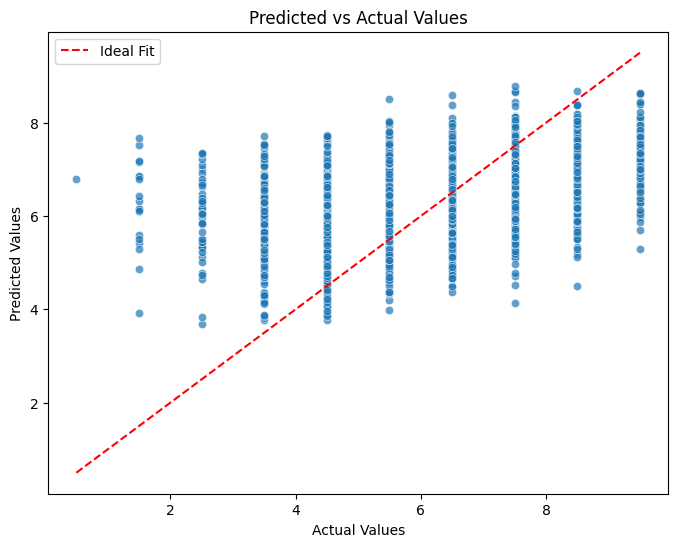

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [ ]:
# Initialize KNN Regressor for GridSearchCV
knr = KNeighborsRegressor()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'p': [1, 2]  # Power parameter for Minkowski metric
}

# GridSearchCV for averageRating
grid_search = GridSearchCV(estimator=knr,param_grid=param_grid_knn,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)


# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}


In [ ]:
# Train initial KNN Regression model with GridSearchCV
knr = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 15, p = 1, weights = 'distance')
knr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = knr.predict(X_test)
print("KNN Regression Performance after GridSearchCV:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

KNN Regression Performance after GridSearchCV:
RMSE: 1.196582217571494
R^2 Score: 0.24621253626433148


In [ ]:
# Initialize KNN Regressor for RandomizedSearchCV
knn = KNeighborsRegressor()

# Define the parameter distributions for RandomizedSearchCV
param_distributions_knn = {
    'n_neighbors': np.arange(1, 31),  # Wider range of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'p': [1, 2]  # Power parameter for Minkowski metric
}

# RandomizedSearchCV for averageRating
random_search = RandomizedSearchCV(estimator=knn,param_distributions=param_distributions_knn,n_iter=50,scoring='neg_mean_squared_error',cv=5,random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)# Define the parameter distributions for tuning

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}


In [ ]:
# Train KNN Regression model with randomsearchcv parameters
knn = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 15, p = 1, weights = 'distance')
knn.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = knn.predict(X_test)
print("Initial KNN Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial KNN Regression Performance:
RMSE: 1.196582217571494
R^2 Score: 0.24621253626433148


In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance for 'averageRating' model
perm_importance_avg = permutation_importance(knn, X_test, y_test, scoring="neg_mean_squared_error", n_repeats=10, random_state=42)

# Create DataFrame for visualization (averageRating)
feature_importance_avg_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance_avg.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display results
print("Feature Importance for Predicting 'averageRating':")
print(feature_importance_avg_df)

Feature Importance for Predicting 'averageRating':
                        Feature  Importance
0                     startYear    0.181482
11                   numRegions    0.165500
15               countryEncoded    0.135703
1                runtimeMinutes    0.083638
13             titleTypeEncoded    0.075309
14                genresEncoded    0.072067
9               canHaveEpisodes    0.056164
3                      numVotes    0.051158
6                  totalCredits    0.038258
4                   totalImages    0.033567
12             userReviewsTotal    0.032274
7            criticReviewsTotal    0.023631
2                     awardWins    0.018789
10                      isAdult    0.015809
8   awardNominationsExcludeWins    0.011071
5                   totalVideos    0.002533


In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','averageRating','ratingCount','canHaveEpisodes','numVotes','totalCredits','totalImages',
                         'userReviewsTotal','criticReviewsTotal', 'awardWins', 'isAdult', 'awardNominationsExcludeWins', 'totalVideos'], axis = 1)
y_train = train_df['averageRating']
X_test = test_df.drop(['originalTitle','averageRating','ratingCount','canHaveEpisodes','numVotes','totalCredits','totalImages',
                         'userReviewsTotal','criticReviewsTotal', 'awardWins', 'isAdult', 'awardNominationsExcludeWins', 'totalVideos'], axis = 1)
y_test = test_df['averageRating']

# Train KNN Regression model with randomsearchcv parameters
knn = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 15, p = 1, weights = 'distance')
knn.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = knn.predict(X_test)
print("Initial KNN Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 1.2183223436559336
R^2 Score: 0.21857331187570173


# numVotes

In [ ]:
# reading the dataset
train_df = pd.read_csv('train9.csv')
test_df = pd.read_csv("test4.csv")

In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','numVotes','ratingCount'], axis = 1)
y_train = train_df['numVotes']
X_test = test_df.drop(['originalTitle','numVotes','ratingCount'], axis = 1)
y_test = test_df['numVotes']

In [ ]:
# Train initial KNN Regression model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = knn.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 0.10472806281797231
R^2 Score: 0.6912295421349393


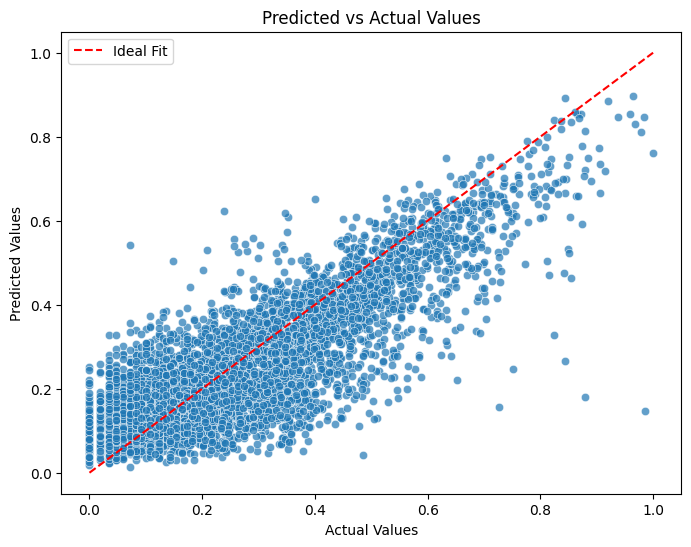

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [ ]:
# Initialize KNN Regressor for GridSearchCV
knr = KNeighborsRegressor()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'p': [1, 2]  # Power parameter for Minkowski metric
}

# GridSearchCV for numVotes
grid_search = GridSearchCV(estimator=knr,param_grid=param_grid_knn,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)


# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}


In [ ]:
# Train KNN Regression model with GridSearchCV
knr = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 15, p = 1, weights = 'distance')
knr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = knr.predict(X_test)
print("KNN Regression Performance after GridSearchCV:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

KNN Regression Performance after GridSearchCV:
RMSE: 0.10141460439417402
R^2 Score: 0.7104586447755222


In [ ]:
# Initialize KNN Regressor for RandomizedSearchCV
knn = KNeighborsRegressor()

# Define the parameter distributions for RandomizedSearchCV
param_distributions_knn = {
    'n_neighbors': np.arange(1, 31),  # Wider range of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'p': [1, 2]  # Power parameter for Minkowski metric
}

# RandomizedSearchCV for averageRating
random_search = RandomizedSearchCV(estimator=knn,param_distributions=param_distributions_knn,n_iter=50,scoring='neg_mean_squared_error',cv=5,random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)# Define the parameter distributions for tuning

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}


In [ ]:
# Train KNN Regression model with randomsearchcv parameters
knn = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 15, p = 1, weights = 'distance')
knn.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = knn.predict(X_test)
print("KNN Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

KNN Regression Performance:
RMSE: 0.10141460439417402
R^2 Score: 0.7104586447755222


In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance for 'numVotes' model
perm_importance_votes = permutation_importance(knn, X_test, y_test, scoring="neg_mean_squared_error", n_repeats=10, random_state=42)

# Create DataFrame for visualization (numVotes)
feature_importance_votes_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance_votes.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance for Predicting 'numVotes':")
print(feature_importance_votes_df)



Feature Importance for Predicting 'numVotes':
                        Feature  Importance
11             userReviewsTotal    0.006729
6            criticReviewsTotal    0.002908
10                   numRegions    0.002372
3                   totalImages    0.002194
5                  totalCredits    0.001662
15               countryEncoded    0.001437
0                     startYear    0.001208
14                genresEncoded    0.000926
8               canHaveEpisodes    0.000798
1                runtimeMinutes    0.000656
13             titleTypeEncoded    0.000614
12                averageRating    0.000389
4                   totalVideos    0.000252
2                     awardWins    0.000146
7   awardNominationsExcludeWins    0.000143
9                       isAdult    0.000131


In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','numVotes','ratingCount','genresEncoded','canHaveEpisodes','runtimeMinutes','titleTypeEncoded','averageRating','awardWins', 'isAdult', 'awardNominationsExcludeWins', 'totalVideos'], axis = 1)
y_train = train_df['numVotes']
X_test = test_df.drop(['originalTitle','numVotes','ratingCount','genresEncoded','canHaveEpisodes','runtimeMinutes','titleTypeEncoded','averageRating','awardWins', 'isAdult', 'awardNominationsExcludeWins', 'totalVideos'], axis = 1)
y_test = test_df['numVotes']

# Train KNN Regression model with randomsearchcv parameters
knn = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 15, p = 1, weights = 'distance')
knn.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = knn.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 0.10553391066783012
R^2 Score: 0.686459487109841


# totalCredits

In [ ]:
# reading the dataset
train_df = pd.read_csv('train9.csv')
test_df = pd.read_csv("test4.csv")

In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','totalCredits','ratingCount'], axis = 1)
y_train = train_df['totalCredits']
X_test = test_df.drop(['originalTitle','totalCredits','ratingCount'], axis = 1)
y_test = test_df['totalCredits']

In [ ]:
# Train KNN Regression model with randomsearchcv parameters
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = knn.predict(X_test)
print("Initial KNN Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial KNN Regression Performance:
RMSE: 0.12725420148493716
R^2 Score: 0.41078748649232033


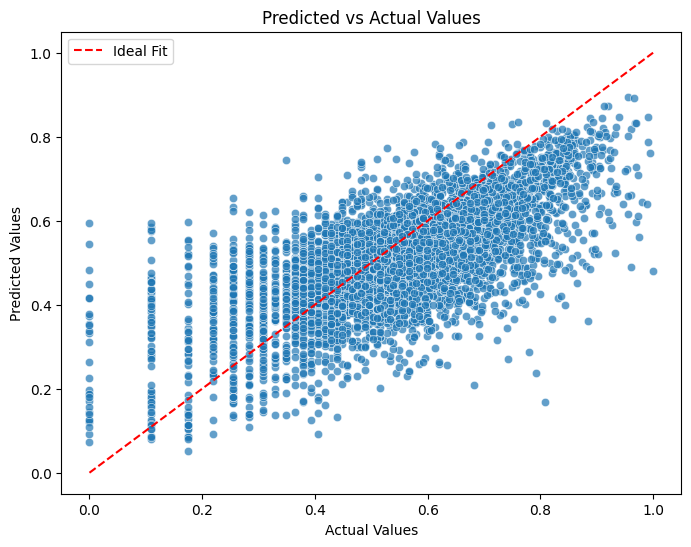

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [ ]:
# Initialize KNN Regressor for GridSearchCV
knr = KNeighborsRegressor()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'p': [1, 2]  # Power parameter for Minkowski metric
}

# GridSearchCV for averageRating
grid_search = GridSearchCV(estimator=knr,param_grid=param_grid_knn,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)


# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}


In [ ]:
# Train initial KNN Regression model with GridSearchCV
knr = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 15, p = 1, weights = 'distance')
knr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = knr.predict(X_test)
print("KNN Regression Performance after GridSearchCV:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

KNN Regression Performance after GridSearchCV:
RMSE: 0.12222322331949872
R^2 Score: 0.4564554227686589


In [ ]:
# Initialize KNN Regressor for RandomizedSearchCV
knn = KNeighborsRegressor()

# Define the parameter distributions for RandomizedSearchCV
param_distributions_knn = {
    'n_neighbors': np.arange(1, 31),  # Wider range of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'p': [1, 2]  # Power parameter for Minkowski metric
}

# RandomizedSearchCV for averageRating
random_search = RandomizedSearchCV(estimator=knn,param_distributions=param_distributions_knn,n_iter=50,scoring='neg_mean_squared_error',cv=5,random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)# Define the parameter distributions for tuning

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}


In [ ]:
# Train KNN Regression model with randomsearchcv parameters
knn = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 15, p = 1, weights = 'distance')
knn.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = knn.predict(X_test)
print("KNN Regression Performance with RandomizedSearchCV:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

KNN Regression Performance with RandomizedSearchCV:
RMSE: 0.12222322331949872
R^2 Score: 0.4564554227686589


In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance for 'totalCredits' model
perm_importance = permutation_importance(knn, X_test, y_test, scoring="neg_mean_squared_error", n_repeats=10, random_state=42)

# Create DataFrame for visualization (totalCreits)
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance for Predicting 'totalCredits':")
print(feature_importance_df)



Feature Importance for Predicting 'totalCredits':
                        Feature  Importance
0                     startYear    0.003291
3                      numVotes    0.002054
13             titleTypeEncoded    0.001814
8               canHaveEpisodes    0.001746
15               countryEncoded    0.001722
14                genresEncoded    0.001546
1                runtimeMinutes    0.001354
10                   numRegions    0.001116
4                   totalImages    0.000840
11             userReviewsTotal    0.000538
6            criticReviewsTotal    0.000295
7   awardNominationsExcludeWins    0.000265
12                averageRating    0.000243
9                       isAdult    0.000231
5                   totalVideos    0.000150
2                     awardWins    0.000097


In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','averageRating','ratingCount','totalCredits','totalImages','userReviewsTotal','criticReviewsTotal', 'awardWins', 'isAdult', 'awardNominationsExcludeWins', 'totalVideos'], axis = 1)
y_train = train_df['totalCredits']
X_test = test_df.drop(['originalTitle','averageRating','ratingCount','totalCredits','totalImages','userReviewsTotal','criticReviewsTotal', 'awardWins', 'isAdult', 'awardNominationsExcludeWins', 'totalVideos'], axis = 1)
y_test = test_df['totalCredits']

# Train KNN Regression model with randomsearchcv parameters
knn = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 15, p = 1, weights = 'distance')
knn.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = knn.predict(X_test)
print("Initial Decision Tree Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Decision Tree Regression Performance:
RMSE: 0.12346133415584828
R^2 Score: 0.4453875263547439
